In [1]:
import pandas as pd

# Load dataset, ensure Channel Name stays as string
df = pd.read_excel("kpop_influencers_dataset.xlsx", dtype={'Channel Name': str})

# Quick look at the data
df.head()


,Channel Name,Channel ID,Subscribers,Views,Videos,Avg Views per Video,Subscribers per Video,Views per Subscriber,Popularity_Score,Video_Saturation
0,HUNTR/X - Topic,UCB-w1qXuClYVjJV49lVothw,509000,685331883,39,17572612.38,13051.28,1346.43,8944459.70,0.000077
1,Saja Boys - Topic,UCIz8Vvt9ux6x7Ryi2sqG1ww,380000,315189696,18,17510538.67,21111.11,829.45,6654004.69,0.000047
2,7clouds K-pop,UCAEHrhfV8zfLcl0XsE2kVVw,45800,12009993,199,60351.72,230.15,262.23,2764.11,0.004345
3,Mnet K-POP,UCbD8EppRX3ZwJSou-TVo90A,22000000,18275614747,42730,427699.85,514.86,830.71,9409396.70,0.001942
4,ALL THE K-POP,UCPde4guD9yFBRzkxk2PatoA,6950000,5019452608,35659,140762.57,194.90,722.22,978299.86,0.005131


In [2]:
# Check for missing values in each column
print("🔍 Missing Values:\n")
print(df.isnull().sum())

# Check for duplicate rows
print("\n🔁 Number of duplicate rows:", df.duplicated().sum())

# show the duplicate rows themselves
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("\nHere are the duplicate rows:")
    display(duplicates)
else:
    print("\n✅ No duplicate rows found.")

# Show rows that contain any missing values
missing_rows = df[df.isnull().any(axis=1)]

if not missing_rows.empty:
    print("\n⚠️ Rows with missing values:\n")
    display(missing_rows)
else:
    print("\n✅ No missing values found in the dataset.")


🔍 Missing Values:

Channel Name             0
Channel ID               0
Subscribers              0
Views                    0
Videos                   0
Avg Views per Video      0
Subscribers per Video    0
Views per Subscriber     0
Popularity_Score         0
Video_Saturation         0
dtype: int64

🔁 Number of duplicate rows: 0

✅ No duplicate rows found.

✅ No missing values found in the dataset.


In [3]:
#Numeric & Categorical Columns
# Numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical / object columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numeric Columns: ['Subscribers', 'Views', 'Videos', 'Avg Views per Video', 'Subscribers per Video', 'Views per Subscriber', 'Popularity_Score', 'Video_Saturation']
Categorical Columns: ['Channel Name', 'Channel ID']


In [4]:
#Data Cleaning & Preprocessing
import re
from sklearn.preprocessing import LabelEncoder
import numpy as np

#Fill missing numeric values with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [5]:
#Fill missing categorical/text values with 'Unknown'
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')


In [6]:
#Clean text columns (if any text like description/title exists)
text_cols = [col for col in df.columns if 'title' in col.lower() or 'description' in col.lower()]

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)          # remove links
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)  # remove punctuation/emojis
    text = text.lower().strip()
    return text

for col in text_cols:
    df[col] = df[col].apply(clean_text)


In [7]:
#Encode categorical features except Channel Name
cat_cols_for_encoding = [col for col in cat_cols if col != 'Channel Name']
le = LabelEncoder()
for col in cat_cols_for_encoding:
    df[col] = le.fit_transform(df[col])


In [8]:
#Feature Engineering
# Log transform skewed numeric columns
for col in ['Subscribers', 'Views', 'Videos']:
    if col in df.columns:
        df[f'Log_{col}'] = np.log1p(df[col])


In [9]:
#Engagement metrics
if set(['Views', 'Subscribers']).issubset(df.columns):
    df['Engagement_Ratio'] = (df['Views'] / (df['Subscribers'] + 1)).round(2)
if set(['Videos', 'Subscribers']).issubset(df.columns):
    df['Posting_Intensity'] = (df['Videos'] / (df['Subscribers'] + 1)).round(2)
if set(['Popularity_Score', 'Video_Saturation']).issubset(df.columns):
    df['Influence_Index'] = (df['Popularity_Score'] / (df['Video_Saturation'] + 1)).round(2)


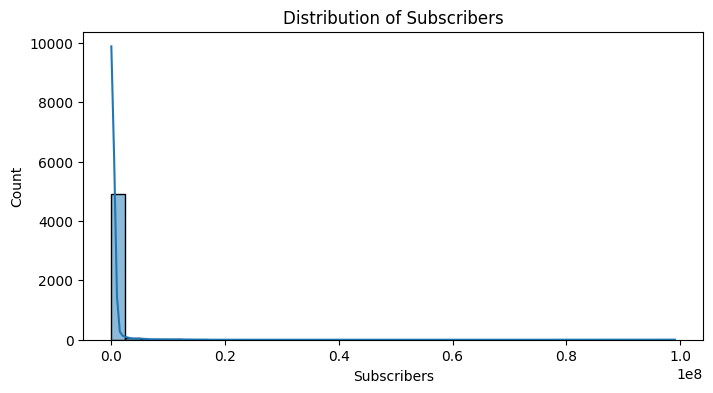

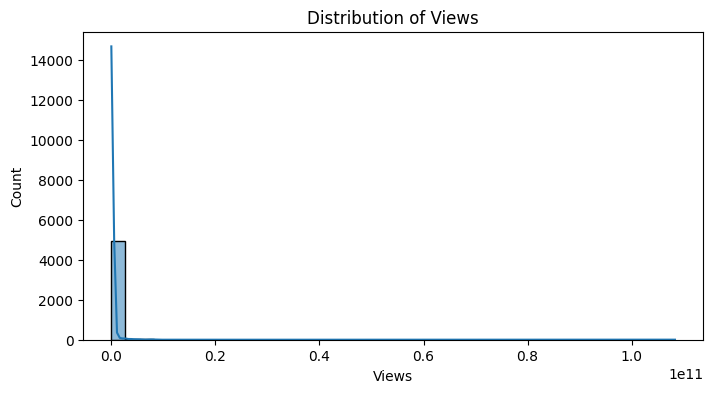

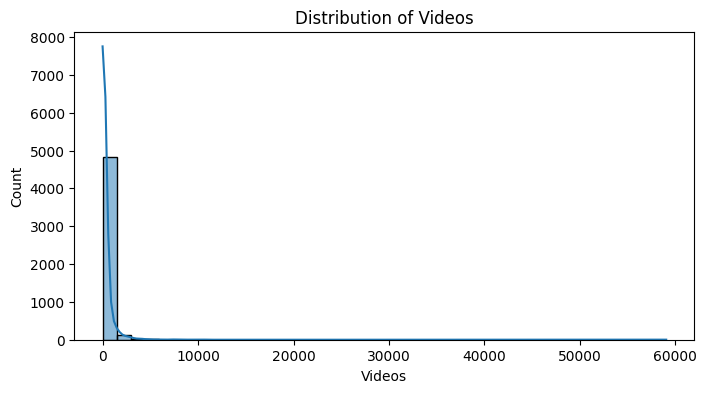

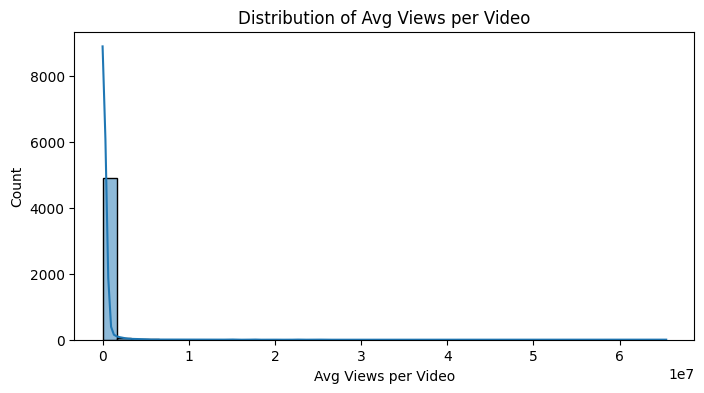

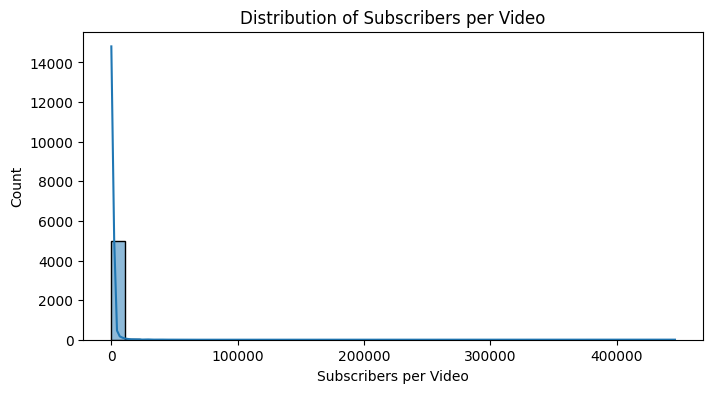

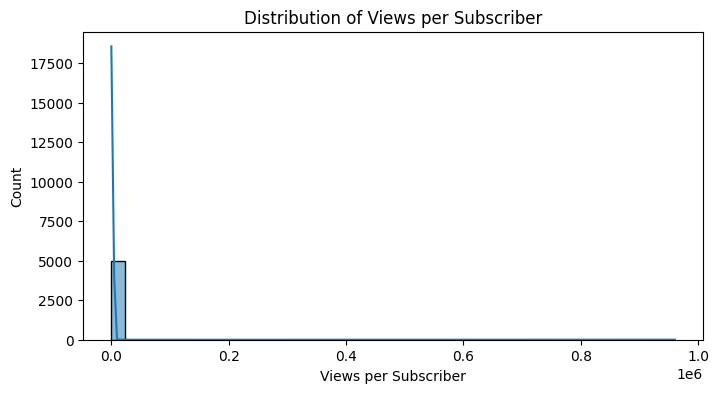

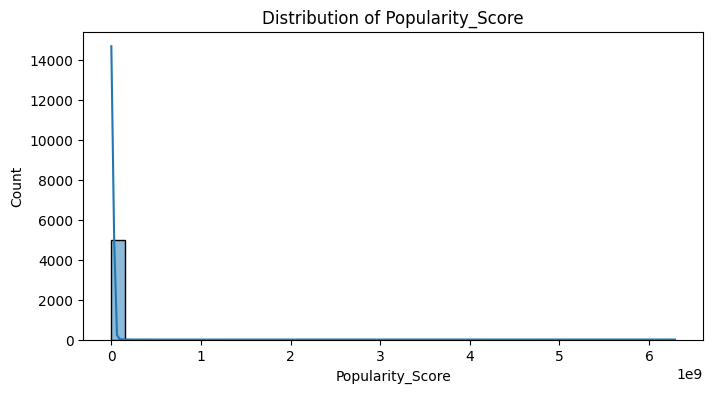

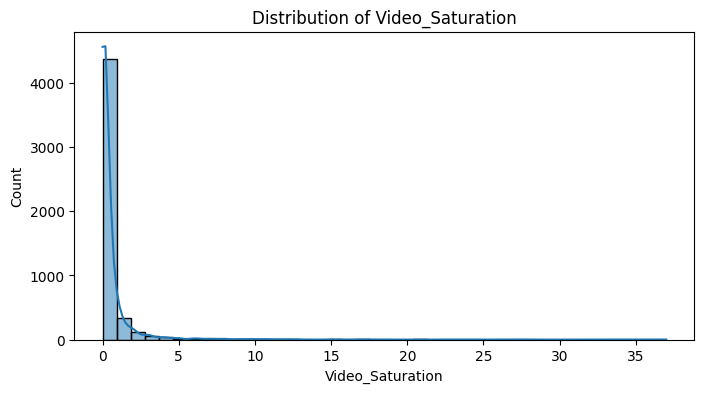

In [10]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric distributions
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


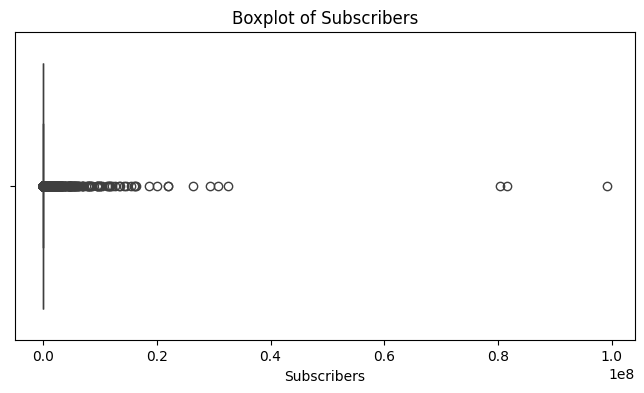

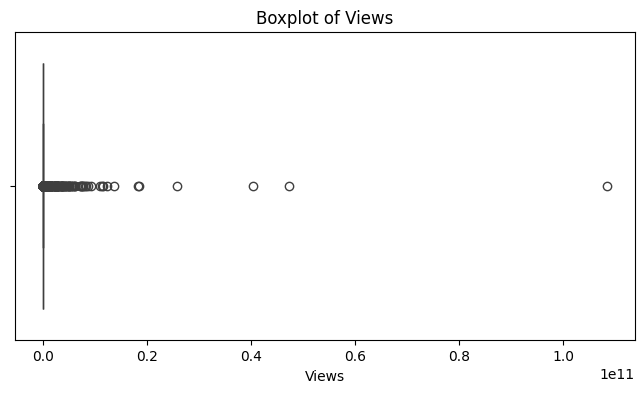

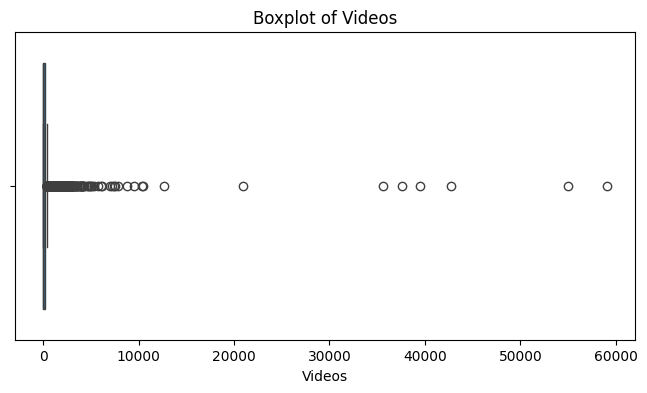

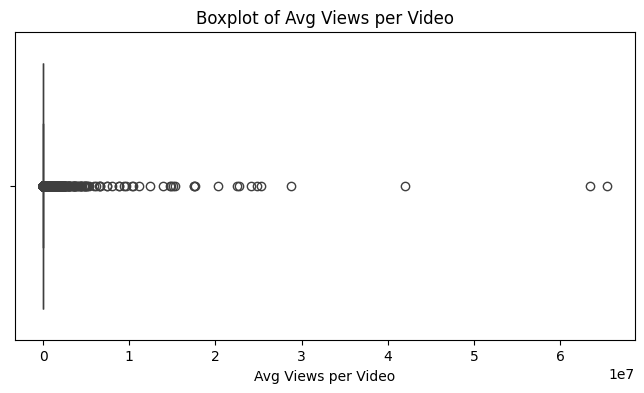

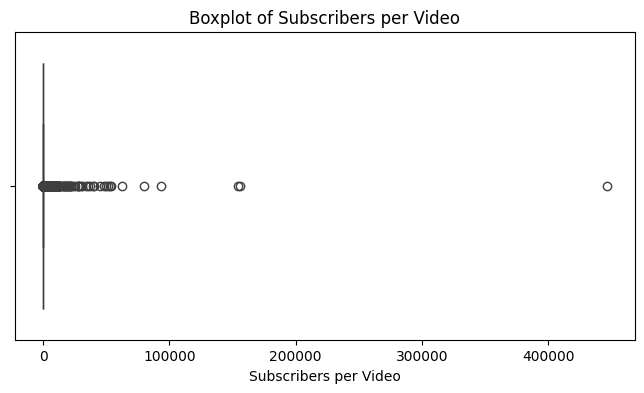

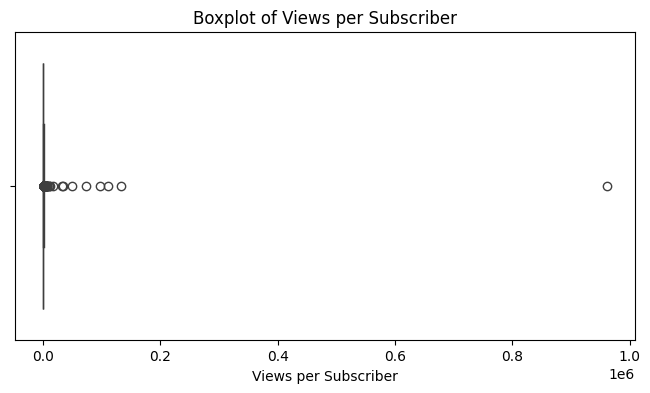

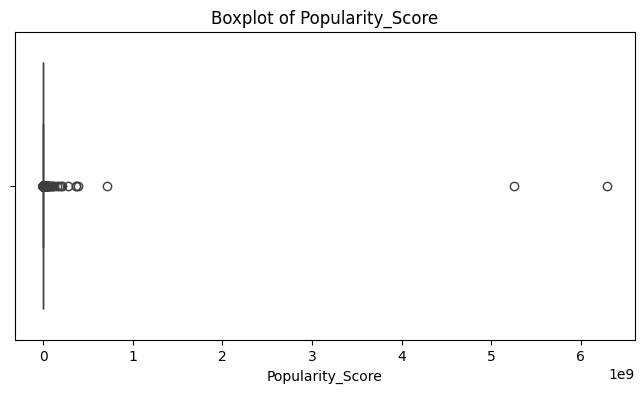

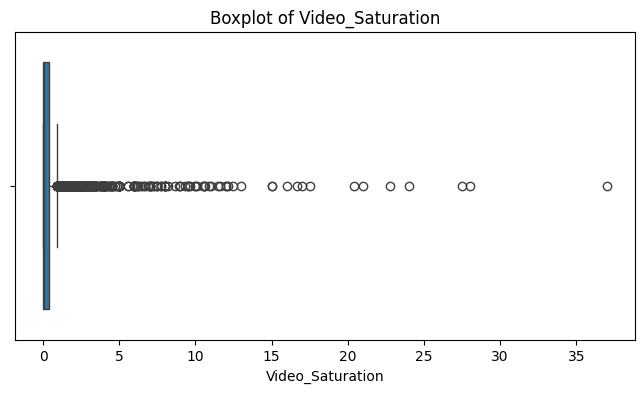

In [11]:
# Boxplots for outliers
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

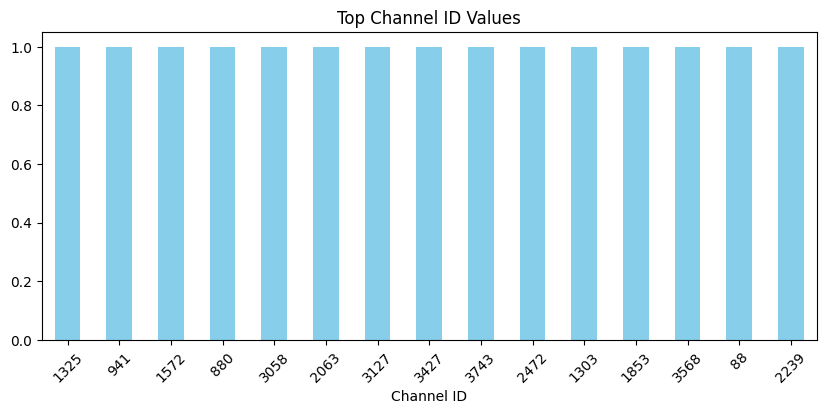

In [12]:
# Categorical distributions (exclude Channel Name)
cat_cols_for_plot = [col for col in cat_cols if col != 'Channel Name']
for col in cat_cols_for_plot:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(15).plot(kind='bar', color='skyblue')
    plt.title(f"Top {col} Values")
    plt.xticks(rotation=45)
    plt.show()

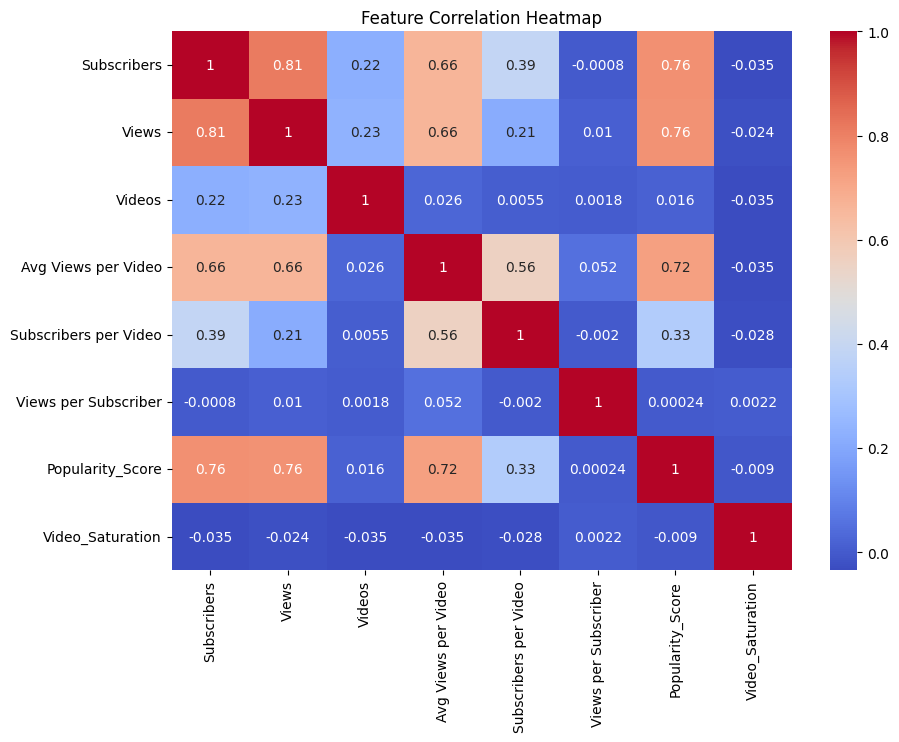

In [13]:
# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
# Top 10 Channels by Subscribers
top_subs = df.sort_values('Subscribers', ascending=False).head(10)
print(top_subs[['Channel Name', 'Subscribers', 'Views', 'Popularity_Score']])


               Channel Name  Subscribers         Views  Popularity_Score
630               BLACKPINK     99100000   40364486616      6.289498e+09
371               BANGTANTV     81600000   25790286363      7.187457e+08
4851        Toys and Colors     80300000  108319675007      5.252458e+09
3129            J House jr.     32500000   47344617867      2.135897e+08
3967   America's Got Talent     30700000    5288154260      6.809830e+07
3021                    ZHC     29300000    3909473140      3.636431e+08
2344  1MILLION Dance Studio     26400000    8608459194      2.598186e+07
3                Mnet K-POP     22000000   18275614747      9.409397e+06
3079             Stray Kids     21900000    9269497946      1.127789e+08
2043                  REACT     20100000   13698819311      5.207987e+07


In [15]:
# Top 10 Channels by Engagement Ratio (if created)
if 'Engagement_Ratio' in df.columns:
    top_engage = df.sort_values('Engagement_Ratio', ascending=False).head(10)
    print(top_engage[['Channel Name', 'Subscribers', 'Views', 'Engagement_Ratio']])

              Channel Name  Subscribers       Views  Engagement_Ratio
3977      N.Flying - Topic          443   425561796         958472.51
629      BLACKPINK - Topic        31900  4251082513         133258.60
3953         LeeHi - Topic         3830   422303481         110233.22
3996  Ex Battalion - Topic         1540   149033434          96712.16
5014           JO1 - Topic         1060    78232802          73734.97
2703   LE SSERAFIM - Topic        34700  1694433229          48829.52
2518   BABYMONSTER - Topic        19800   667475335          33709.17
3959   SUNNYSIDEMJ - Topic         1390    44970398          32329.55
369            BTS - Topic       445000  7213131592          16209.25
4997          sarang_stage         1800    22530471          12509.98


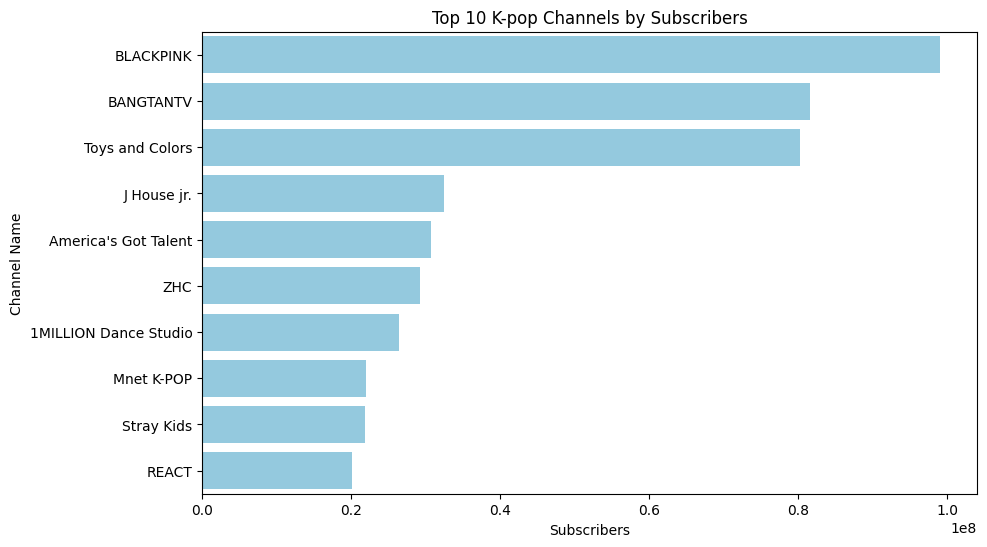

In [16]:
#Bar Chart: Top 10 Channels by Subscribers
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 by Subscribers
top_subs = df.sort_values('Subscribers', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Subscribers', y='Channel Name', data=top_subs, color='skyblue')  # use color instead of palette
plt.title("Top 10 K-pop Channels by Subscribers")
plt.xlabel("Subscribers")
plt.ylabel("Channel Name")
plt.show()


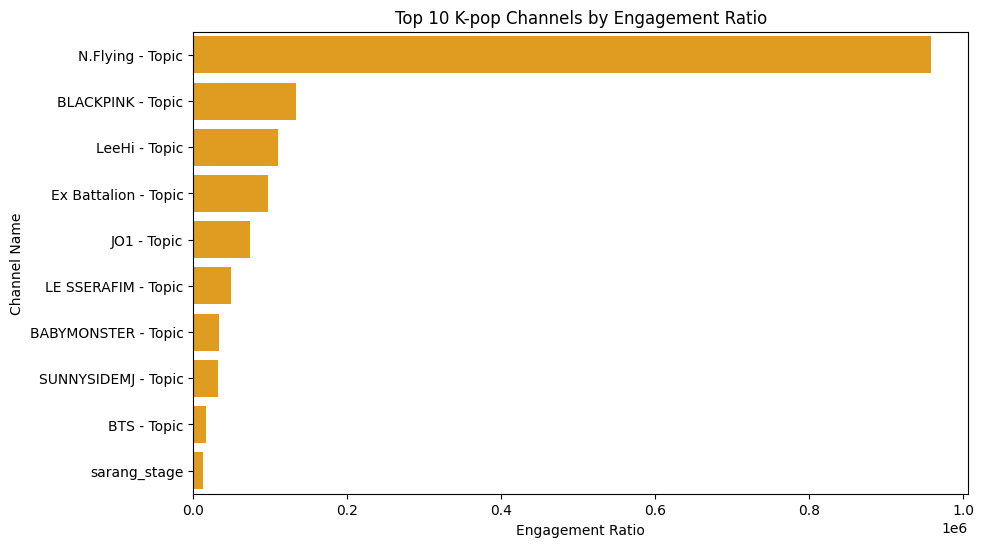

In [17]:
#Bar Chart: Top 10 Channels by Engagement Ratio
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 by Engagement Ratio
top_engage = df.sort_values('Engagement_Ratio', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Engagement_Ratio', y='Channel Name', data=top_engage, color='orange')  # use color instead of palette
plt.title("Top 10 K-pop Channels by Engagement Ratio")
plt.xlabel("Engagement Ratio")
plt.ylabel("Channel Name")
plt.show()



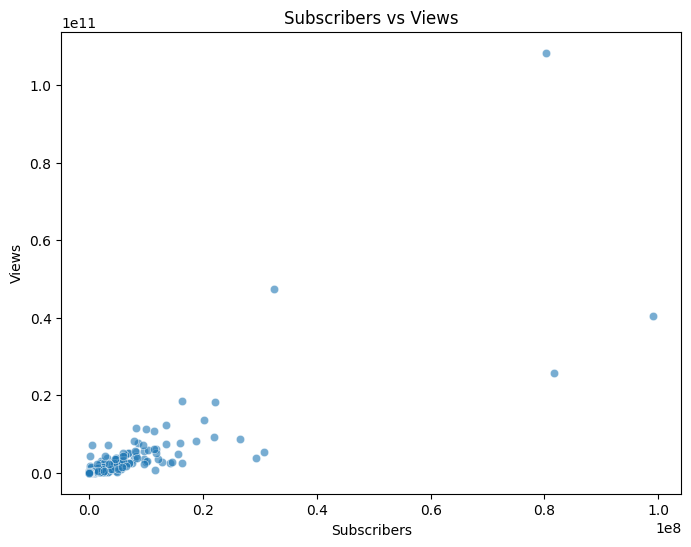

In [18]:
#Scatter Plot: Subscribers vs Views
plt.figure(figsize=(8,6))
sns.scatterplot(x='Subscribers', y='Views', data=df, alpha=0.6)
plt.title("Subscribers vs Views")
plt.xlabel("Subscribers")
plt.ylabel("Views")
plt.show()


In [19]:
#Top Influencer Tables
# Top 10 by Subscribers
top_subs = df.sort_values('Subscribers', ascending=False).head(10)
print(top_subs[['Channel Name', 'Subscribers', 'Views', 'Popularity_Score']])

# Top 10 by Engagement Ratio
if 'Engagement_Ratio' in df.columns:
    top_engage = df.sort_values('Engagement_Ratio', ascending=False).head(10)
    print(top_engage[['Channel Name', 'Subscribers', 'Views', 'Engagement_Ratio']])


               Channel Name  Subscribers         Views  Popularity_Score
630               BLACKPINK     99100000   40364486616      6.289498e+09
371               BANGTANTV     81600000   25790286363      7.187457e+08
4851        Toys and Colors     80300000  108319675007      5.252458e+09
3129            J House jr.     32500000   47344617867      2.135897e+08
3967   America's Got Talent     30700000    5288154260      6.809830e+07
3021                    ZHC     29300000    3909473140      3.636431e+08
2344  1MILLION Dance Studio     26400000    8608459194      2.598186e+07
3                Mnet K-POP     22000000   18275614747      9.409397e+06
3079             Stray Kids     21900000    9269497946      1.127789e+08
2043                  REACT     20100000   13698819311      5.207987e+07
              Channel Name  Subscribers       Views  Engagement_Ratio
3977      N.Flying - Topic          443   425561796         958472.51
629      BLACKPINK - Topic        31900  4251082513      

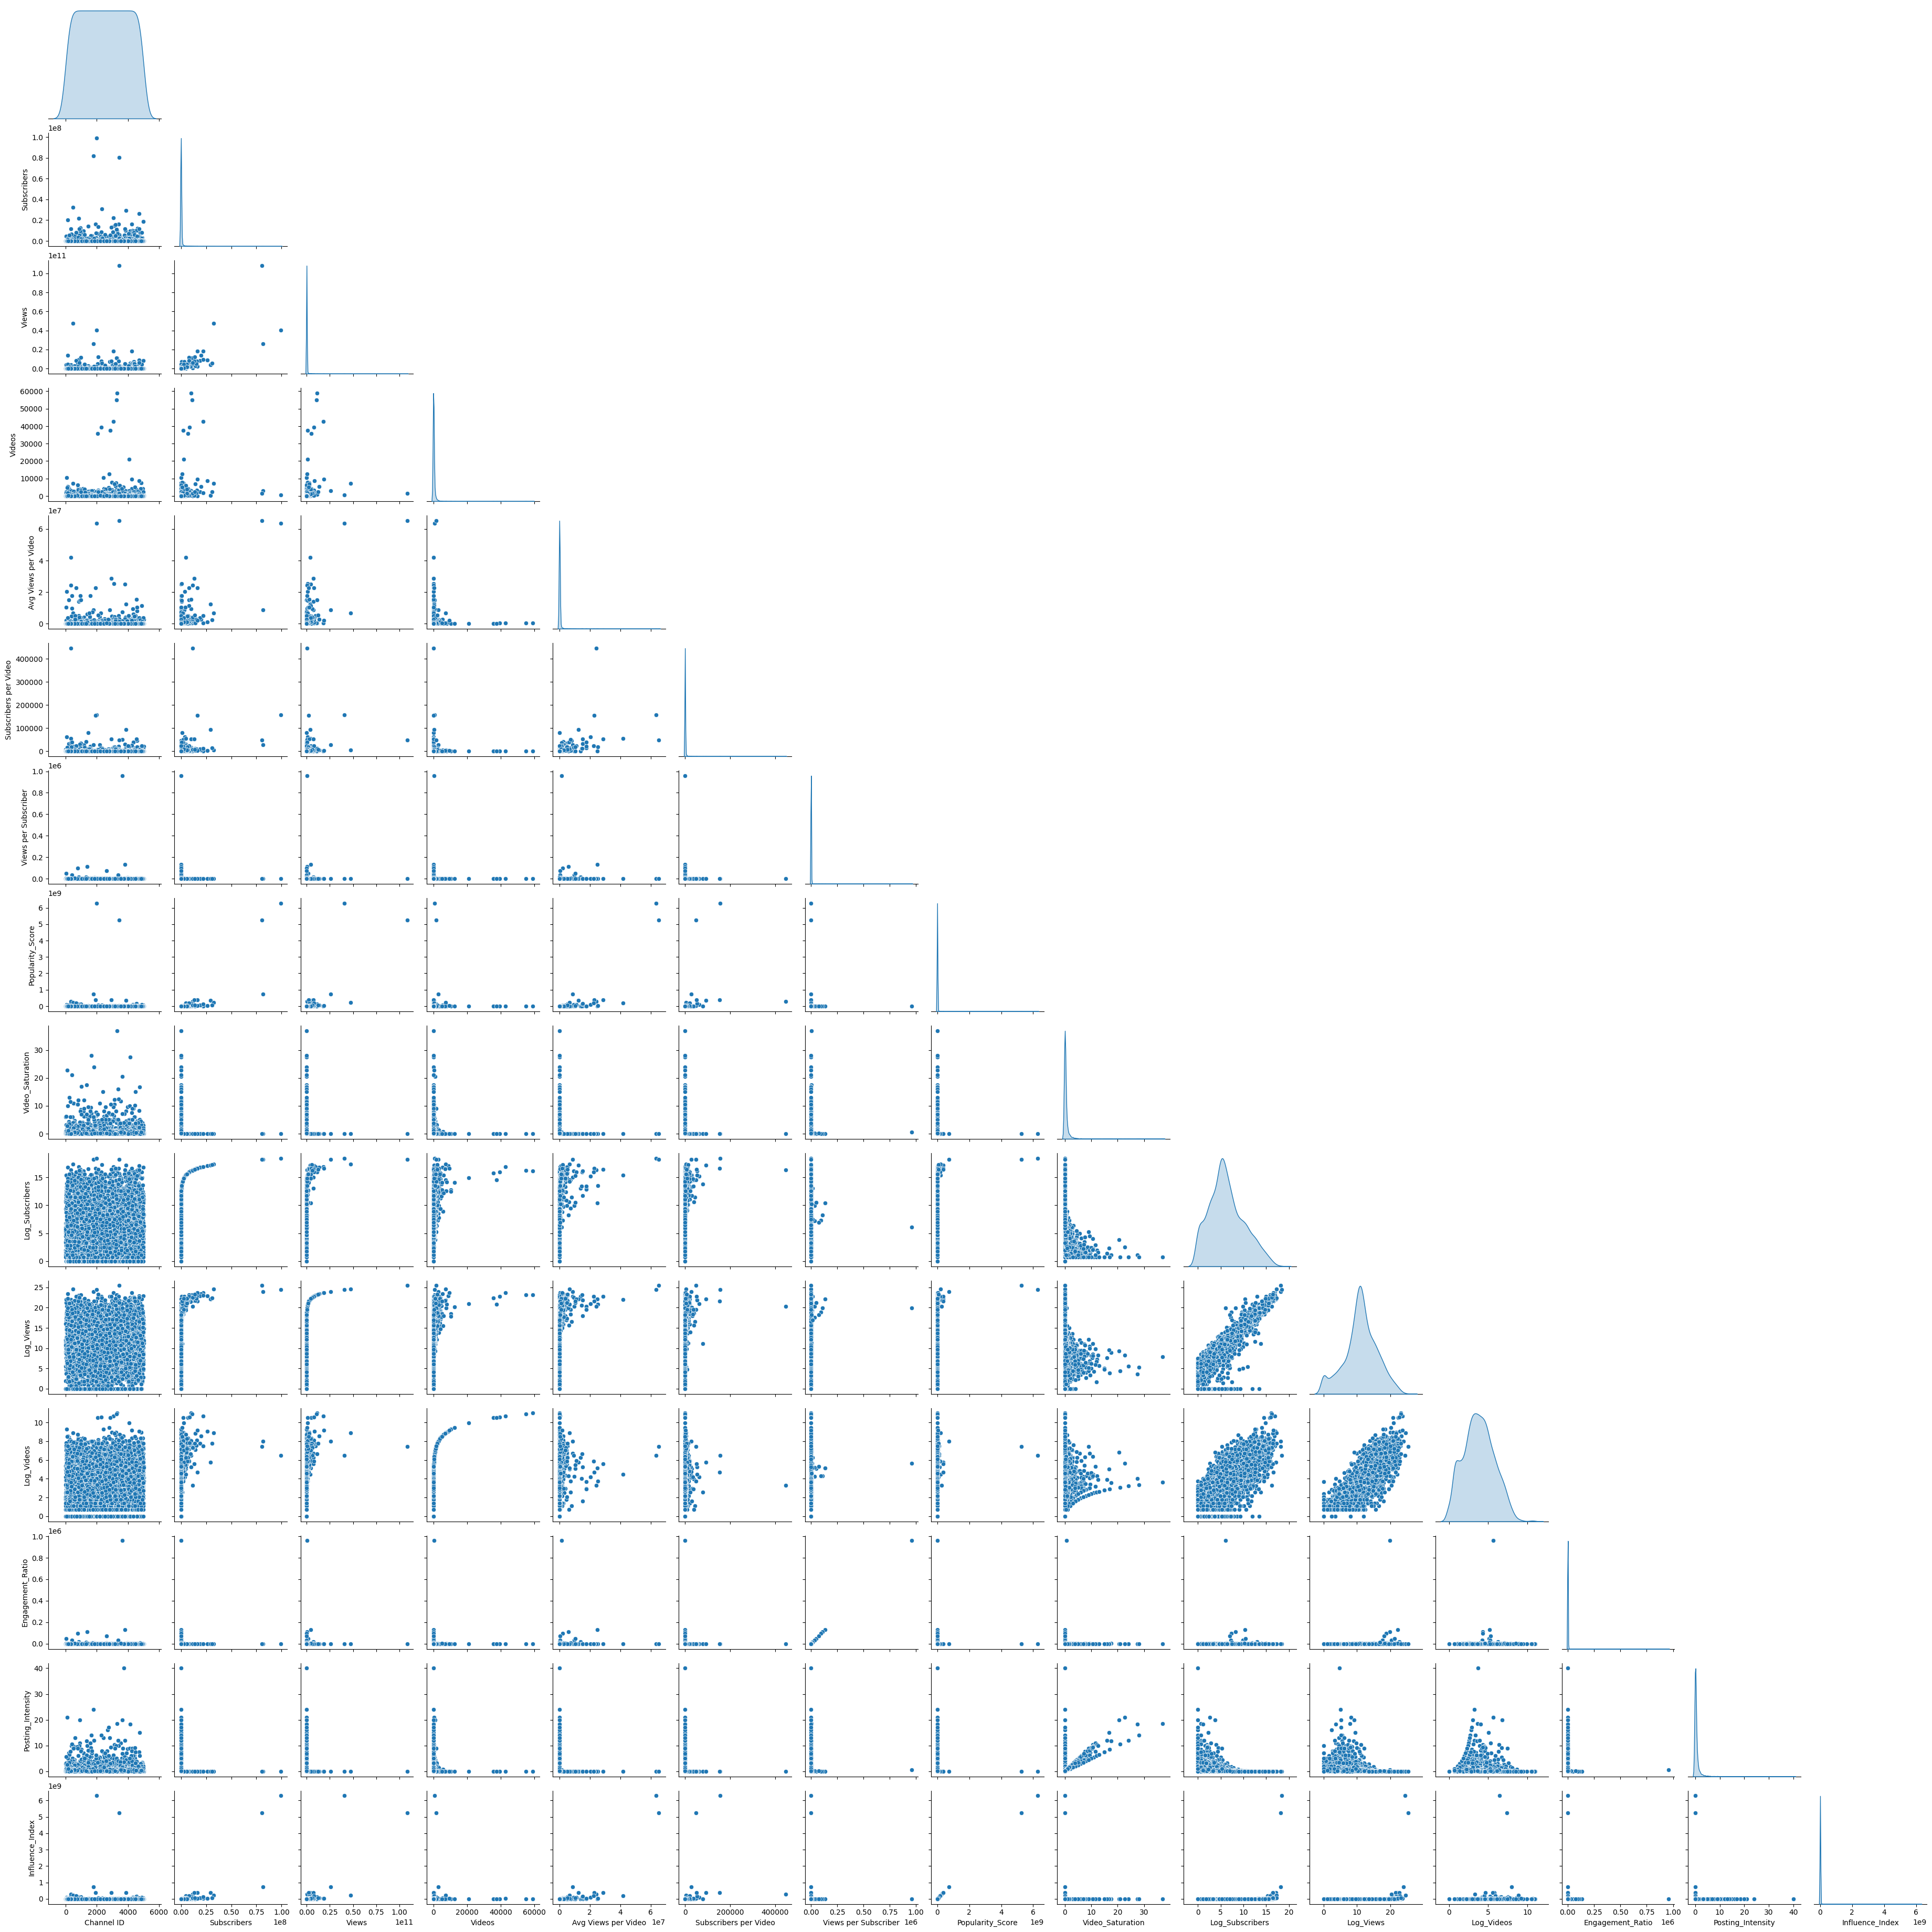

In [20]:
#Pairplot for numeric features
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
sns.pairplot(df[num_cols], diag_kind='kde', corner=True)
plt.show()


In [21]:
# =========================
# 1️⃣ Imports
# =========================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# =========================
# 2️⃣ Create Target Column (Top 15%)
# =========================
threshold = df['Engagement_Ratio'].quantile(0.85)
df['Top_Engagement'] = (df['Engagement_Ratio'] >= threshold).astype(int)

# =========================
# 3️⃣ One-Hot Encode Categorical Features
# =========================
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'Channel Name']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# =========================
# 4️⃣ Scale Numeric Features
# =========================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [col for col in num_cols if col not in ['Engagement_Ratio', 'Influence_Index', 'Top_Engagement']]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# =========================
# 5️⃣ Features and Target
# =========================
X = df.drop(columns=['Channel Name', 'Engagement_Ratio', 'Influence_Index', 'Top_Engagement'])
y = df['Top_Engagement']

# =========================
# 6️⃣ Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =========================
# 7️⃣ Apply SMOTE to Training Set
# =========================
smote = SMOTE(random_state=42)
X_train_res_np, y_train_res = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame to preserve column names
X_train_res = pd.DataFrame(X_train_res_np, columns=X_train.columns)

# =========================
# 8️⃣ Initialize Models
# =========================
dt_model = DecisionTreeClassifier(max_depth=6, min_samples_split=20, min_samples_leaf=10,
                                  class_weight='balanced', random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=10,
                                  class_weight='balanced', random_state=42)

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# =========================
# 9️⃣ Train Models
# =========================
dt_model.fit(X_train_res, y_train_res)
rf_model.fit(X_train_res, y_train_res)
lr_model.fit(X_train_res, y_train_res)

# =========================
# 10. Evaluation Function
# =========================
def evaluate_model(model, name):
    print(f"\n================== {name} ==================")

    # Train evaluation (on resampled training set)
    y_train_pred = model.predict(X_train_res)
    print("---- Train Results ----")
    print("Accuracy:", accuracy_score(y_train_res, y_train_pred))
    print(confusion_matrix(y_train_res, y_train_pred))

    # Test evaluation (on original test set)
    y_test_pred = model.predict(X_test)
    print("\n---- Test Results ----")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))

# =========================
# 11️⃣ Evaluate All Models
# =========================
evaluate_model(dt_model, "Decision Tree")
evaluate_model(rf_model, "Random Forest")
evaluate_model(lr_model, "Logistic Regression")



================== Decision Tree ==================
---- Train Results ----
Accuracy: 0.9969208211143695
[[3404    6]
 [  15 3395]]

---- Test Results ----
Accuracy: 0.9960159362549801
[[850   3]
 [  1 150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       0.98      0.99      0.99       151

    accuracy                           1.00      1004
   macro avg       0.99      0.99      0.99      1004
weighted avg       1.00      1.00      1.00      1004


================== Random Forest ==================
---- Train Results ----
Accuracy: 0.9975073313782992
[[3398   12]
 [   5 3405]]

---- Test Results ----
Accuracy: 0.9960159362549801
[[849   4]
 [  0 151]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       0.97      1.00      0.99       151

    accuracy                           1.00      1004
   macro avg       0.99      1.00    